# Correlations

#### Imports

In [7]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()

#### Load 2015 USA Census Data
Save all rows of data to dataframe called `usa`

```python
usa = pd.read_csv('../../data/census_2015/acs2015_county_data.csv')
```

#### We only care obout those rows belonging to `Michigan`...for now.
The line of code below is extremely common —we've talked about filtering rows before, but let's quickly break it down for review and really get a sense for what is happening.

```python
mi = usa[usa['State'] == 'Michigan']
```

<br>

## Filter Rows - Deep Dive

### -The Boolean Series-
This will return a boolean series, this essentially goes down every single row of `usa`, looks at the `State` field and checks if it is `==` to `Michigan`. If it is, the matching index for the resulting series will be populated with a `True`; if it is not, the matching index of the resulting series will be populated with a `False`

I added a .head() to limit the printout, but if you took it off you will `False` values for days, this is because the `usa` dataframe is sorted alphabetically by `State`, so all of the `True` values belonging to `Michigan` will be somewhere along the middle of the distribution and hidden from view

```python
(usa['State'] == 'Michigan').head()
```

> **Pro-Tip:**
Try replacing the `.head()` with a `.sum()` to get the **total** number of `True` values in a boolean series. There should only be 83 rows in the entire `usa` dataframe, where the state is `Michigan`

```python
(usa['State'] == 'Michigan').sum()
```

> **Pro-Tip:**
Try replacing the `.sum()` with a `.mean()` to get the **proportion** of values that are `True`, about 2.5% of the rows in the entire `usa` dataframe, where the state is `Michigan`.

```python
(usa['State'] == 'Michigan').mean()

# For percentage
(usa['State'] == 'Michigan').mean() * 100
```

<br>

### -Boolean indexing-
Now, we take that boolean series and use it to `index` the original `usa` dataframe, wherever the series has a `False` value, that row will be filtered out and only where the series is `True` will that row be kept. The following lines of code will illustrate this.

#### Comparing shape
Becuase the resulting boolean series has as many values as the original dataframe, we can pass it in as an index, in this step we will look at the shape of both objects to prove this point.

It is not necessary to save the boolean series to a variable, we can do it all in one step like we did at the very beginning, but if you do go this route, make sure you pick a descriptive name.

```python
state_is_michigan = usa['State'] == "Michigan"

# 3220 Rows, 1 Column
print(state_is_michigan.shape)

# 3220 Rows, 37 Column
print(usa.shape)

# Remember, we are filtering rows, so the difference in columns is irrelevant
```

#### Index `usa` - Simple
I picked a random range to index the dataframe, this is not too dissimilar from what we are about to do with the boolean series.

```python
usa[55:60]
```

#### Index `usa` - Boolean
Now, we pass in the boolean series, instead of the random range

```python
# we can save over original `mi` variable, it doesn't matter in this case
mi = usa[state_is_michigan]
mi.head()
```

#### Verify the final shape
Look at that! same amount of rows in the final `mi` dataframe as there were `True` values in `state_is_michigan`

```python
mi.shape
```

#### Recap
Below are both approaches once again, for context

```python
# One-Liner
mi = usa[usa['State'] == 'Michigan']

# Broken-down
state_is_michigan = usa['State'] == 'Michigan'
mi = usa[state_is_michigan]
```

<br>
<br>
<br>

## Multivariate Exploratory Analysis 
aka Scatter plots

### Scatter
A scatter plot attempts to describe the `correlation`, sometimes called `covariance` between 2 continuous distributions of numbers. The idea is to test how the values of one change along with those of the other.

Some common examples of correlations include
**Positive Correlation:**
- Sunlight and Plant Height - As the amount of sunlight a plant receives increases, so does the plant's height.
- Time spend Studying and Grade - As the amt of time spent studying for a test inc, so does a student's score on said test.
- etc...

**Negative Correlation**
- Absences and Grades - As a students # of abscences from school increases, their average grades decrease
- Speed and Time spent driving - As the speed in my car increases, the amt of time it takes me to get to x decreases. 
- etc...

#### Example Plots
The folowing plots are extremely ideal, in practice a scatter plot will most certainly not be this clear cut, there will be outliers throughout, but if a correlation is present, there will either be a general trend up —or down.

<img src="Correlation-V1.0-Figure-A-and-B.png">

<br>

### Exercise 1:
I would like for you to list 3 more examples for each type of correlation below, this will also serve as practice for the markdown language, which is what is used in `markdown` cells. Notice the 4 `#` before Exercise 1, that made a heading of level 4.

#### More Positive Correlations:
- here
- here
- here

#### More Negative Correlations:
- here
- here
- here

<br>
<br>

### Our First Scatter Plot
Whatever we put as the values for `feat1` and `feat2` will decide the output of the remaining cells of this notebook. For the exercise portion of this class we will be trying different combinations to test possible correlations.

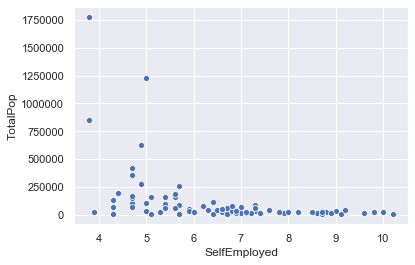

In [30]:
feat1 = "TotalPop"
feat2 = "SelfEmployed"
# feat3 = "Income"

sns.scatterplot(x= feat2, y= feat1, data=mi)
plt.show()

<br>
<br>

### Covariance
The covariance is a measure of correlation, we can see that there are some repeated values in the resulting matrix, this is because the correlations are measured in combinations.

Becuaseu of the confusing nature of the covariance matrix, we must seek out a better way to test the correlation between 2 numerical distributions, as it turns out a statistician by the name of `pearson` developed a much more roboust measure of correlation, which we will discuss below!

In [31]:
np.cov(mi[feat1], mi[feat2])

array([[ 6.70637016e+10, -1.77790952e+05],
       [-1.77790952e+05,  2.63093153e+00]])

<br>
<br>

### Pearson Correlation Coefficient

This function takes in the string values for 2 olumns and the df to which they belong and returns a value Between -1 and 1, this value is called the PEarson Correlation Coefficient, It's entire purpose is to give a single number value that describes the intensity of a correlation. 

A really positive correlation will tend toward +1 
A really negative correlation will tend towards -1 
A non correlation will hover around 0, usually a small negative or positive decimal.

In [52]:
def pearson_coeff(feat_1, feat_2, df):
    
    x = df[feat_1]
    y = df[feat_2]
    
    covar = np.cov(x,y)[0,1]
    std_x = np.std(x)
    std_y = np.std(y)
    
    
    print('Pearson Correlation Coefficient:')
    print(feat_1, "VS.", feat_2)
    
    return covar / (std_x * std_y)

#### Call the function on the 2 features that were defined above.
Aka call the function, pass in feat_1 = `feat1`, featu_2 = `feat2`, and df = `mi`

BTW if you don't understand what a function is doing, that is okay. It is very common to treat a function like a black box, we may not know how it does what it does, but if the source is reputable enoug,  we can trust that it will take in a certain input and kick back our desired output. In this case, the inputs are described in the function definition and the output is the pearson correlation coefficient for those inputs

Visually, it does look like there is a general trend downwards, but it hard to tell how intense the negative correlation is, the numerical output of this function gives us a much better understanding of the kind of correlation present. 

In this case the correlation is around -.4, which is far enough from 0 to be considered a bonafide negative correlation, not a huge one like a -.7, but still significant enough to be measured.